In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import rcParams
import seaborn as sns



sns.set()
%matplotlib inline

In [2]:
bom_movie_gross = pd.read_csv("bom.movie_gross.csv.gz")
imdb_name_basics = pd.read_csv("imdb.name.basics.csv.gz")
imdb_title_akas = pd.read_csv("imdb.title.akas.csv.gz")
imdb_title_basics = pd.read_csv("imdb.title.basics.csv.gz")
imdb_title_crew = pd.read_csv("imdb.title.crew.csv.gz")
imdb_title_principals = pd.read_csv('imdb.title.principals.csv.gz')
imdb_title_principals.head()
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
rt_movie_info = pd.read_csv('rt.movie_info.tsv.gz',delimiter='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')

In [3]:
# Converting money categories from string to integers

gross = pd.to_numeric(tn_movie_budgets.worldwide_gross.str.replace('$','').str.replace(',',''))

budget = pd.to_numeric(tn_movie_budgets.production_budget.str.replace('$','').str.replace(',',''))

domestic_gross = pd.to_numeric(tn_movie_budgets.domestic_gross.str.replace('$','').str.replace(',',''))

# Reassigning the columns in the df to be integers and making an ROI column

tn_movie_budgets['worldwide_gross'] = gross
tn_movie_budgets['production_budget'] = budget
tn_movie_budgets['domestic_gross'] = domestic_gross

# Creating ROI and it's column
roi = (gross - budget)/budget
tn_movie_budgets['roi'] = roi
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696


In [4]:
# Checking out the highest ROI
roi.sort_values(ascending=False); # Highest ROI index is 5745

In [5]:
# What movie is the highest ROI?
tn_movie_budgets.iloc[5745]
# It's porn. With a name like Microsoft, porn might not be our forte.

id                             46
release_date         Jun 30, 1972
movie                 Deep Throat
production_budget           25000
domestic_gross           45000000
worldwide_gross          45000000
roi                          1799
Name: 5745, dtype: object

In [6]:
# Next highest:
roi.sort_values(ascending=False) # Index 5613
tn_movie_budgets.iloc[5613]; # Mad Max. Ok. ROI of Mad Max was 497.75

In [7]:
# Grab the movies from the data frame between the years 2010 and 2018
# First, start get a mask to filter the df later
mask = (pd.to_datetime(tn_movie_budgets.release_date) >= '2010-01-01') &\
        (pd.to_datetime(tn_movie_budgets.release_date) < '2019-01-01')

In [8]:
# Filtering by date:
tn_movie_budgets_to_date = tn_movie_budgets[mask]

In [9]:
tn_movie_budgets_to_date.shape#.sort_values('roi', ascending=False)

(2124, 7)

In [10]:
# Now we want to join this data frame to another dataframe with genre info
# Setting the index of each to movies and joining on the index
tn_movie_budgets_to_date.index = tn_movie_budgets_to_date['movie']
imdb_title_basics.index = imdb_title_basics['primary_title']

In [11]:
# making a the data frame that has all the info we are interested in
the_df = tn_movie_budgets_to_date.join(imdb_title_basics, how = 'inner')
the_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
#Horror,16,"Nov 20, 2015",#Horror,1500000,0,0,-1.000000,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror"
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Strong,64,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,1.031954,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"


In [12]:
# Any ROI with the value -1 is likely missing data. Writing a loop to replace this with nan
for index, element in enumerate(the_df['roi']):
    if (element < -0.9999999) & (element > -1.01):
        the_df['roi'][index] = np.nan
        

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
the_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
#Horror,16,"Nov 20, 2015",#Horror,1500000,0,0,NaN,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror"
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Strong,64,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,1.031954,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"


In [14]:
# Dropping rows with any nan values
the_df.dropna(inplace=True)
the_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Strong,64,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,1.031954,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
127 Hours,6,"Nov 5, 2010",127 Hours,18000000,18335230,60217171,2.345398,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama"


In [15]:
# Sort genres by median ROI
test_median = the_df.groupby('genres').roi.median().sort_values(ascending = False)
test_median.head()

# Top 5 genres are below

genres
Comedy,Romance,Sport       27.807633
Horror,Romance,Thriller    26.179241
Horror,Mystery,Thriller    14.900007
Adventure,Horror           11.931420
Biography,Drama,Fantasy    11.679440
Name: roi, dtype: float64

In [16]:
# Sample size is of concern. We want to drop any genre with less than 10 movies
# Counting the number of movies in each genre
test_count = the_df.groupby('genres').roi.count().sort_values(ascending = False)

count_df = pd.DataFrame(test_count)
median_df = pd.DataFrame(test_median)

joined_genre_df = median_df.join(count_df, how ='inner', lsuffix='median', rsuffix = 'count')

In [17]:
# Ok, sort by genre by count
joined_genre_df.sort_values(by='roicount', ascending=False) 

# Only keep genres that have more than 10 movies
good_genres = joined_genre_df[joined_genre_df['roicount'] >= 10]
good_genres = good_genres.sort_values(by = 'roimedian', ascending = False)
good_genres.head()
# These are our new top 5 genres by median ROI

,roimedian,roicount
genres,,
"Horror,Mystery,Thriller",14.900007,33
"Drama,Horror,Thriller",3.570256,11
"Action,Adventure,Animation",2.697137,15
"Action,Adventure,Comedy",2.658676,23
"Action,Sci-Fi,Thriller",2.649604,10


In [18]:
# Making a list of good genres to use
list_of_good_genres = list(good_genres.index)
list_of_good_genres

['Horror,Mystery,Thriller',
 'Drama,Horror,Thriller',
 'Action,Adventure,Animation',
 'Action,Adventure,Comedy',
 'Action,Sci-Fi,Thriller',
 'Action,Adventure,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Comedy,Romance',
 'Drama,Horror,Mystery',
 'Action,Adventure,Thriller',
 'Action,Thriller',
 'Comedy,Drama,Music',
 'Biography,Drama,History',
 'Comedy,Drama,Romance',
 'Adventure,Comedy,Family',
 'Horror',
 'Adventure,Family,Fantasy',
 'Action,Drama,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Biography,Comedy,Drama',
 'Comedy,Drama',
 'Adventure,Comedy,Drama',
 'Action,Comedy,Crime',
 'Biography,Documentary',
 'Drama,Fantasy,Horror',
 'Biography,Drama',
 'Horror,Thriller',
 'Drama,Romance',
 'Comedy',
 'Comedy,Crime,Drama',
 'Action,Crime,Thriller',
 'Biography,Drama,Sport',
 'Action,Adventure,Drama',
 'Action,Drama,Thriller',
 'Drama,Mystery,Thriller',
 'Crime,Drama',
 'Biography,Crime,Drama',
 'Documentary',
 'Action,Crime,Drama',
 'Drama,Music',
 'Thriller',
 'Drama,Thriller',
 'Drama',
 

In [19]:
the_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Strong,64,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,1.031954,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History"
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
127 Hours,6,"Nov 5, 2010",127 Hours,18000000,18335230,60217171,2.345398,tt1542344,127 Hours,127 Hours,2010,94.0,"Adventure,Biography,Drama"


In [20]:
# Select these genres out of our data frame
index_list = []
for index, element in enumerate(the_df['genres']):
    if element in list_of_good_genres:
        index_list.append(index)

In [21]:
good_sample_df = the_df.iloc[index_list,:]

In [22]:
good_sample_df.head() # This is our data frame that has the desired sample size and no nan values.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
13 Sins,51,"Apr 18, 2014",13 Sins,4000000,9134,47552,-0.988112,tt2059171,13 Sins,13 Sins,2014,93.0,"Horror,Thriller"
2 Guns,39,"Aug 2, 2013",2 Guns,61000000,75612460,132493015,1.172017,tt1272878,2 Guns,2 Guns,2013,109.0,"Action,Comedy,Crime"


In [23]:
# Dealing with duplicate movies
good_sample_df.index.duplicated().sum()
# There are 309 duplications

309

In [24]:
# Getting rid of duplicates
good_sample_df2 = good_sample_df.copy() # Backup copy just in case
good_sample_df2.drop_duplicates(subset='movie', keep='first',inplace = True)

In [25]:
good_sample_df2.head(50) # Good. Worked.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
10 Cloverfield Lane,54,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",10 Days in a Madhouse,12000000,14616,14616,-0.998782,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama
12 Years a Slave,18,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,8.051267,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History"
13 Sins,51,"Apr 18, 2014",13 Sins,4000000,9134,47552,-0.988112,tt2059171,13 Sins,13 Sins,2014,93.0,"Horror,Thriller"
2 Guns,39,"Aug 2, 2013",2 Guns,61000000,75612460,132493015,1.172017,tt1272878,2 Guns,2 Guns,2013,109.0,"Action,Comedy,Crime"
21 Jump Street,44,"Mar 16, 2012",21 Jump Street,42000000,138447667,202812429,3.828867,tt1232829,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime"
22 Jump Street,85,"Jun 13, 2014",22 Jump Street,50000000,191719337,331333876,5.626678,tt2294449,22 Jump Street,22 Jump Street,2014,112.0,"Action,Comedy,Crime"
3,85,"Sep 16, 2011",3,7200000,59774,295492,-0.958959,tt1517177,3,3,2010,119.0,"Comedy,Drama,Romance"
3 Backyards,51,"Mar 11, 2011",3 Backyards,300000,39475,39475,-0.868417,tt1314190,3 Backyards,3 Backyards,2010,88.0,Drama
3 Days to Kill,64,"Feb 21, 2014",3 Days to Kill,28000000,30697999,38959900,0.391425,tt2172934,3 Days to Kill,3 Days to Kill,2014,117.0,"Action,Drama,Thriller"


In [26]:
# Dropping duplicate columns
good_sample_df2.drop(columns=['movie', 'primary_title', 'original_title'],inplace = True)

In [27]:
genre_df = good_sample_df2.copy()
genre_df.head()

# The dataframe is ready

,id,release_date,production_budget,domestic_gross,worldwide_gross,roi,tconst,start_year,runtime_minutes,genres
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422,20.657284,tt1179933,2016,103.0,"Drama,Horror,Mystery"
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616,-0.998782,tt3453052,2015,111.0,Drama
12 Years a Slave,18,"Oct 18, 2013",20000000,56671993,181025343,8.051267,tt2024544,2013,134.0,"Biography,Drama,History"
13 Sins,51,"Apr 18, 2014",4000000,9134,47552,-0.988112,tt2059171,2014,93.0,"Horror,Thriller"
2 Guns,39,"Aug 2, 2013",61000000,75612460,132493015,1.172017,tt1272878,2013,109.0,"Action,Comedy,Crime"


# Introduction

We wanted to find out which types of genres are most likely to be successful with the data we have. To do so we wanted to make a couple of metrics on which we could quantify the "best" genres by. The first metric we defined is

In [30]:
%%latex
Now we are going to create a new metric by which to quantify our genres. $$\\$$

This metric is the benefit-to-risk ratio. Which is defined like it sounds: $$\\$$

\begin{equation} Benefit-To-Risk = \frac{Benefit}{Risk} \end{equation} $$\\$$

where Benefit is defined as the median ROI for a genre of movies and Risk is defined as ratio of films that lost money over 
the total number of films for a genre.




<IPython.core.display.Latex object>

In [31]:
# First, finding benefit
benefit = genre_df.groupby('genres').median()['roi'] 


In [32]:
# Now finding risk
total_genre_count = genre_df['genres'].value_counts() # Good
total_genre_count_and_one = total_genre_count + 1 #Good # Adding 1 to avoid divsion by zero 
                                                #(incase a certain genre did not lose money)


#Action,Adventure,Sci-Fi and Action,Adventure,Thriller have no failed profits. Scaling all movies up by 1.
failed_in_genre_count = genre_df[genre_df['roi']<0].groupby('genres').count()['roi'] + 1
failed_in_genre_count['Action,Adventure,Sci-Fi'] = 1
failed_in_genre_count['Action,Adventure,Thriller'] = 1


risk = np.array(failed_in_genre_count)/np.array(total_genre_count_and_one )




In [33]:
# now we have our Benefit-to-risk ratio
b2r = benefit/risk
b2r

genres
Action,Adventure,Animation    110.582606
Action,Adventure,Comedy        30.001365
Action,Adventure,Drama          3.772566
Action,Adventure,Fantasy       14.296041
Action,Adventure,Sci-Fi        17.253396
Action,Adventure,Thriller       5.627188
Action,Comedy,Crime             4.354347
Action,Crime,Drama             13.622374
Action,Crime,Thriller           7.008401
Action,Drama,Sci-Fi            31.822165
Action,Drama,Thriller           5.351135
Action,Sci-Fi,Thriller         42.276235
Action,Thriller                24.153735
Adventure,Animation,Comedy     26.948957
Adventure,Comedy,Drama         13.831059
Adventure,Comedy,Family         5.930294
Adventure,Family,Fantasy        4.621385
Biography,Comedy,Drama         15.193387
Biography,Crime,Drama           1.136026
Biography,Documentary           6.480223
Biography,Drama                 3.313452
Biography,Drama,History         1.590866
Biography,Drama,Sport           0.268967
Comedy                          0.651227
Comedy,Cr

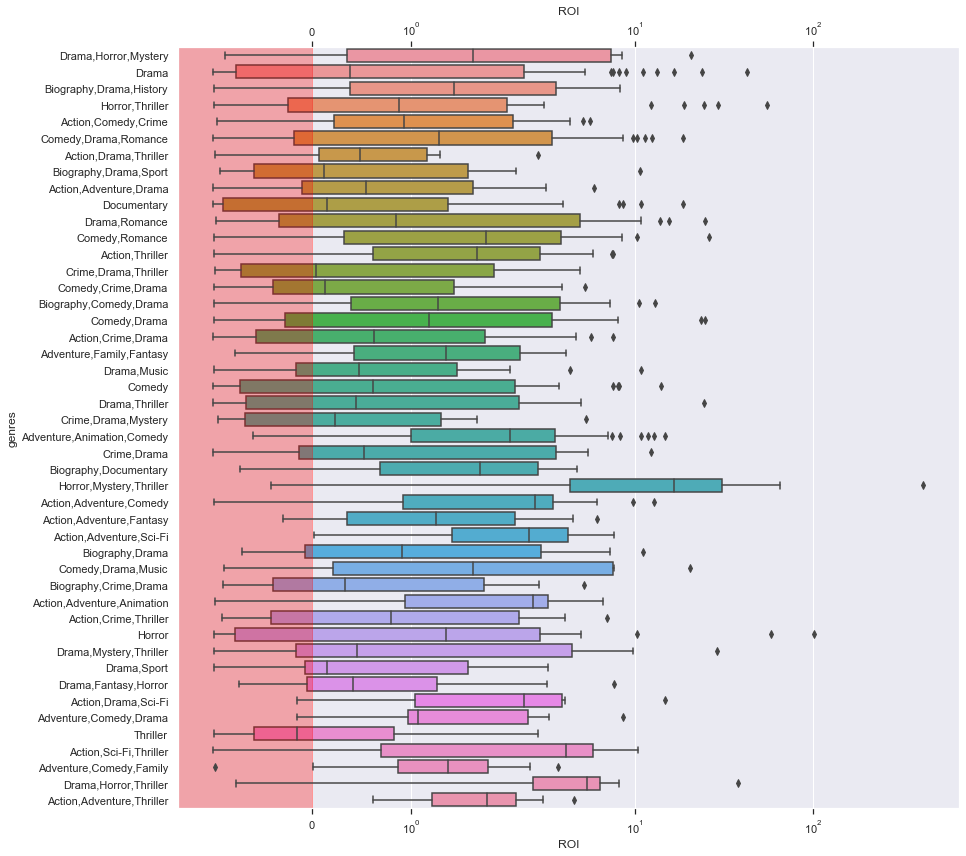

In [51]:
sns.set_context("notebook") # Make it presentable in notebook
ax = sns.boxplot(data = genre_df, y='genres', x='roi') # makes the boxplot
ax.set(xscale='symlog') # allows for negative values on log scale
ax.set_xlabel("ROI") # label
rect = Rectangle((-5,-1), 5, 100, color='red', alpha=.3) # creates rectangle that signifies loss of money
ax.add_patch(rect) # adds the rectangle
rcParams['figure.figsize'] = 14, 14 # controls figure size

# Puts the x axis on the top and bottom
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True

ax.set_title('ROI')
plt.show()

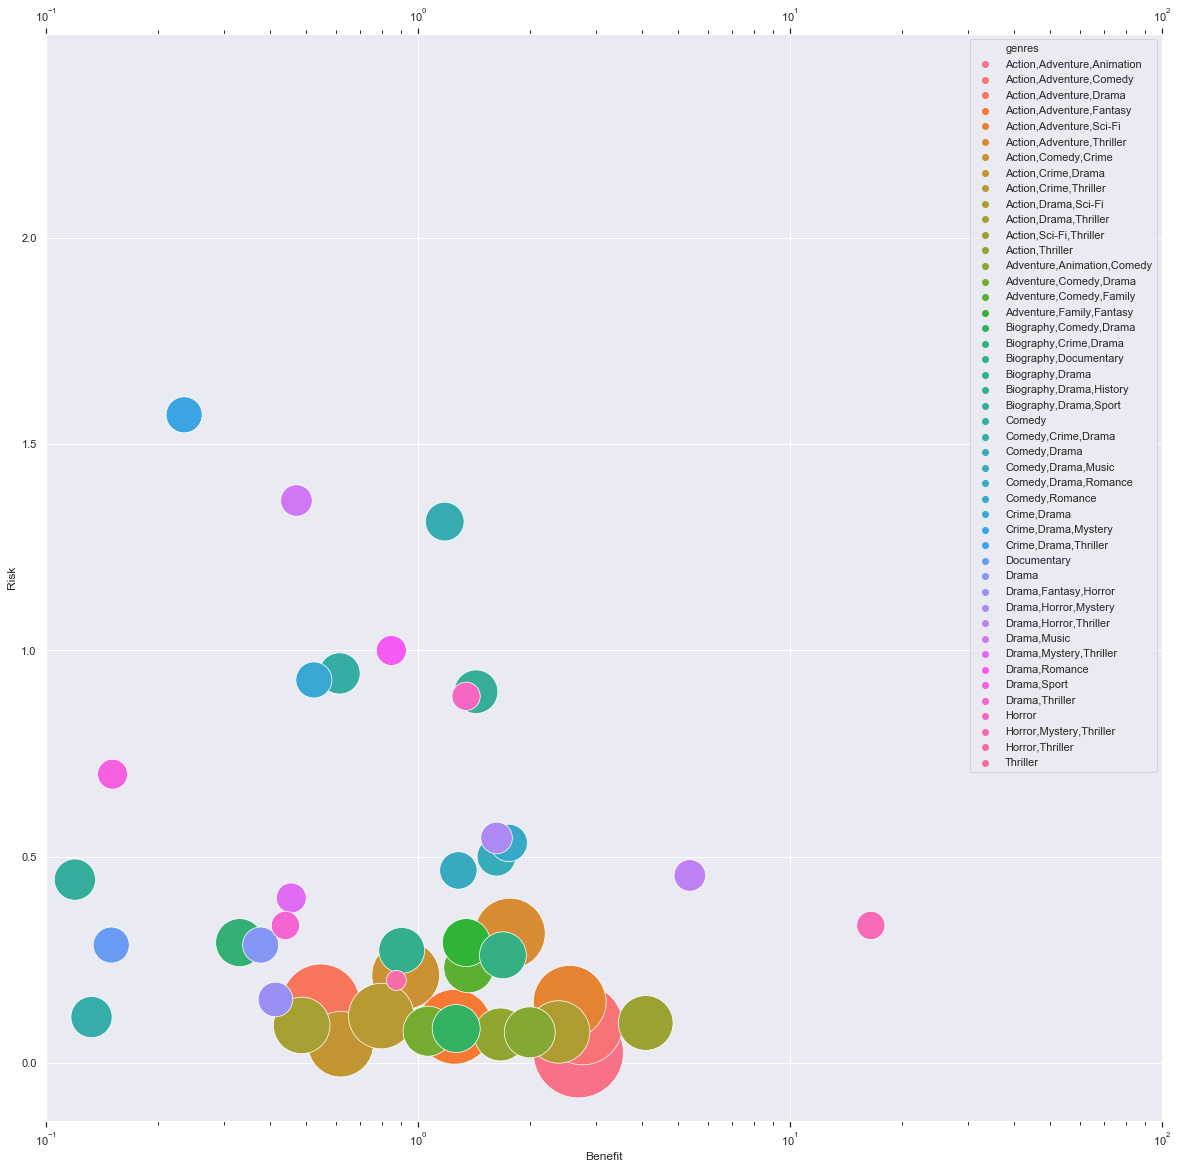

In [50]:
ax = sns.scatterplot( x=benefit, y=risk, hue=benefit.index, s=list(total_genre_count*100))
ax.set(xscale='log')
ax.set_xlabel("Benefit")
ax.set_ylabel('Risk')
ax.set_xlim(0.1,100)

rcParams['figure.figsize'] = 14, 14

plt.show()

In [ ]:
# taking top 5 BtoR and replotting genre vs roi w/violin...plots?

sorted_BtoR = BtoR.sort_values(ascending=False)
top5_genres = sorted_BtoR[:7]
top5_genres

In [ ]:
index_list = []
for index, element in enumerate(mwlsg_final['genres']):
    if element in top5_genres:
        index_list.append(index)

In [ ]:
top5_df = mwlsg_final.iloc[index_list, :]
top5_df

In [ ]:
ax = sns.boxplot(data = top5_df, y='genres', x='plotted3')
ax.set(xscale='symlog')
ax.set_xlabel("ROI")
ax.set_ylabel('Top 5 Benefit-to-Risk Genres')
rect = Rectangle((-5,-1), 5, 100, color='red', alpha=.3)
ax.add_patch(rect)
rcParams['figure.figsize'] = 14, 14

plt.show()

In [ ]:
top5_df[top5_df.genres=='Horror,Mystery,Thriller'].roi.sort_values(ascending=False)

In [ ]:
sorted_BtoR = BtoR.sort_values()

In [ ]:
bottom5_genres = sorted_BtoR[:5]


In [ ]:
index_list = []
for index, element in enumerate(mwlsg_final['genres']):
    if element in bottom5_genres:
        index_list.append(index)

In [ ]:
bottom5_df = mwlsg_final.iloc[index_list, :]
bottom5_df

In [ ]:
Biography_drama_sport = bottom5_df[bottom5_df['genres']=='Biography,Drama,Sport']
x_biography_drama_sport = list(np.arange(0,1, 1/len(Biography_drama_sport)))
x_biography_drama_sport
y_biography_drama_sport = Biography_drama_sport['roi']
y_biography_drama_sport

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1)

ax1 = sns.boxplot(data = Biography_drama_sport, y='genres', x='plotted3')
ax1 = sns.scatterplot(x = x_biography_drama_sport, y = y_biography_drama_sport)

In [ ]:
budget_arr = np.array(mwlsg_final['worldwide_gross'])
budget_arr=pd.to_numeric(budget_arr)


In [ ]:
mwlsg_final2['worldwide_gross'] = budget_arr

In [ ]:
mwlsg_final2.head()

In [ ]:
for index, element in enumerate(mwlsg_final['worldwide_gross']):
    mwlsg_final['worldwide_gross'].iloc[index] = mwlsg_final['worldwide_gross'].iloc[index].replace(',','').replace('$','')


In [ ]:
mwlsg_final2[mwlsg_final2['roi']>400]

In [ ]:
horror_df = mwlsg_final2[mwlsg_final2['genres'] == 'Horror,Mystery,Thriller']
horror_df
profit_horror = horror_df['worldwide_gross']-horror_df['production_budget']

In [ ]:
#Action,Adventure,Sci-Fi = AASF 
AASF_df = mwlsg_final2[mwlsg_final2['genres'] == 'Action,Adventure,Sci-Fi']

In [ ]:
# Adventure,Animation,Comedy = AAC
AAC_df = mwlsg_final2[mwlsg_final2['genres'] == 'Adventure,Animation,Comedy']

In [ ]:
# Comedy,Romance 
CR_df = mwlsg_final2[mwlsg_final2['genres'] == 'Comedy,Romance']

In [ ]:
# Comedy,Drama,Romance
CDR_df = mwlsg_final2[mwlsg_final2['genres'] == 'Comedy,Drama,Romance']

In [ ]:
plt.figure(0)
plt.scatter(x = horror_df['production_budget'], y=horror_df['roi'], color = 'k', label = 'Horror,Mystery,Thriller', alpha=0.7)
plt.scatter(x=AASF_df['production_budget'], y=AASF_df['roi'], color ='b', label = 'Action,Adventure,Sci-Fi',alpha = 0.7)
plt.scatter(x=AAC_df['production_budget'], y=AAC_df['roi'], color='orange', label = 'Adventure,Animation,Comedy', alpha=0.7)
plt.scatter(x=CR_df['production_budget'], y=CR_df['roi'], color='pink', label = 'Comedy,Romance', alpha=0.7)
plt.scatter(x=CDR_df['production_budget'], y=CDR_df['roi'], color='g', label = 'Comedy,Drama,Romance', alpha=0.7)
plt.xscale('log')
plt.title('  Top 5 Genres \n ROI vs Budget')
plt.legend(loc='best')
rcParams['figure.figsize'] = 25, 8
plt.xticks([1e5, 1e6,1e7,1e8],['$100,000', '$1M', '$10M', '$100M'])
plt.ylim(-10,80)
plt.xlabel('Budget Spending (USD)')
plt.ylabel('Return On Investment (ROI)')

In [ ]:
horror_budget_mean = str(round(horror_df['production_budget'].mean()/1e6,1)) +'M'
horror_budget_median = str(round(horror_df['production_budget'].median()/1e6,1))+'M'
horror_roi_mean = round(horror_df['roi'].mean(),1)
horror_roi_median = round(horror_df['roi'].median(),1)
#AASF_df
AASF_budget_mean = str(round(AASF_df['production_budget'].mean()/1e6,1))+'M'
AASF_budget_median = str(round(AASF_df['production_budget'].median()/1e6,1))+'M'
AASF_roi_mean = round(AASF_df['roi'].mean())
AASF_roi_median = round(AASF_df['roi'].median())
#AAC_df
AAC_budget_mean = str(round(AAC_df['production_budget'].mean()/1e6,1))+'M'
AAC_budget_median = str(round(AAC_df['production_budget'].median()/1e6,1))+'M'
AAC_roi_mean = round(AAC_df['roi'].mean(),1)
AAC_roi_median = round(AAC_df['roi'].median(),1)
#CR_df
CR_budget_mean = str(round(CR_df['production_budget'].mean()/1e6,1))+'M'
CR_budget_median = str(round(CR_df['production_budget'].median()/1e6,1))+'M'
CR_roi_mean = round(CR_df['roi'].mean(),1)
CR_roi_median = round(CR_df['roi'].median(),1)
#CDR_df
CDR_budget_mean = str(round(CDR_df['production_budget'].mean()/1e6,1))+'M'
CDR_budget_median = str(round(CDR_df['production_budget'].median()/1e6,1))+'M'
CDR_roi_mean = round(CDR_df['roi'].mean(),1)
CDR_roi_median = round(CDR_df['roi'].median(),1)


horror_budget_median

In [ ]:
data = [[horror_budget_median,  horror_roi_median],
        [ AASF_budget_median,  AAC_roi_median],
        [AAC_budget_median, AAC_roi_median],
        [CR_budget_median, CR_roi_median],
        [ CDR_budget_median, CDR_roi_median]
       ]
data

#columns = ('Horror, Mystery, Thriller', 'Action, Adventure, Sci-Fi', 'Adventure, Animation, Comedy', 'Comedy, Romance', 'Comedy, Drama, Romance')
#rows = ['Mean Budget', 'Median Budget', 'Mean ROI', 'Median ROI']

#plt.table(cellText= data, rowLabels=rows,colLabels=columns, loc='top')

In [ ]:
horror_df.index

In [ ]:
CDR_df.index

In [ ]:
CR_df.index

In [ ]:
AASF_df.index

In [ ]:
AAC_df.index

In [ ]:
profitable.drop('The Gallows', axis=0, inplace=True)

In [ ]:
profitable = mwlsg_final2[mwlsg_final2['roi']>0]

In [ ]:
profitable['roi'].plot(kind='hist', bins = 100)
plt.xlim(0,20)

In [ ]:
mwlsg_final2['roi']